In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df_train = pd.read_csv("blackFriday_train.csv")

In [123]:
df_test = pd.read_csv("blackFriday_test.csv")

In [24]:
pd.set_option('display.max_rows' ,1000)
pd.set_option('display.max_columns' ,1000)


In [37]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [40]:
print(df_train.shape)
print(df_test.shape)

(550068, 12)
(233599, 11)


In [124]:
df = pd.concat([df_train,df_test],axis=0)

In [43]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [44]:
df.shape

(783667, 12)

In [125]:
df.drop(['User_ID'],axis=1,inplace=True)

In [72]:
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


### Converting categorical data into integer ones by using mapping function.

In [126]:
df['Gender'] = df['Gender'].replace(('F','M'),(0,1))
#df['Gender'] = df['Gender'].replace({F:0,M:1})
#df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [57]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [127]:
df['Age'] = df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [62]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

### creating dummies for the categorical data.

In [128]:
city = pd.get_dummies(df['City_Category'],drop_first=True)

In [129]:
df = pd.concat([df,city],axis=1)

In [130]:
df.drop(['City_Category'],inplace=True,axis=1)

In [131]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### visualizing last 5 rows of the dataset.


In [77]:
df.tail(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1
233598,P00316642,0,5,0,4+,1,4,5.0,NaN,NaN,1,0


### Checking for columnwise null values 

In [75]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
### Checking for columnwise null values 

### visualizing unique values of fields which contains NAN values for different columns.

In [80]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [81]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [82]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Renaming the columns

In [132]:
df = df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'})
#df = df.rename(columns={'cat3':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'})

In [133]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

In [136]:
df.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array(['2', '4', '3', '1', '0'], dtype=object)

### Replacing the value by using str method.


In [135]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [137]:
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].astype(int)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        537685 non-null  float64
 8   cat3                        237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

### converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [140]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

### Creatimg  a checkpoint 

In [141]:
df_i = df.copy()

# Dropping the unnecessary field.
df_i.drop('Product_ID',axis=1,inplace=True)

In [236]:
df_i.head(10)

,index,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,0,1,10,2,0,3,0,0,8370.0,0,0
1,1,0,1,10,2,0,1,6,14,15200.0,0,0
2,2,0,1,10,2,0,12,0,0,1422.0,0,0
3,3,0,1,10,2,0,12,14,0,1057.0,0,0
4,4,1,7,16,4,0,8,0,0,7969.0,0,1
5,5,1,3,15,3,0,1,2,0,15227.0,0,0
6,6,1,5,7,2,1,1,8,17,19215.0,1,0
7,7,1,5,7,2,1,1,15,0,15854.0,1,0
8,8,1,5,7,2,1,1,16,0,15686.0,1,0
9,9,1,3,20,1,1,8,0,0,7871.0,0,0


In [147]:
df_i['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [229]:
df_i['cat1'] = df_i['cat1'].fillna(0)
df_i['cat2'] = df_i['cat2'].fillna(0)
df_i['cat3'] = df_i['cat3'].fillna(0)

In [234]:
df_i.isna().sum()

index                              0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [232]:
df_i['cat2'] = df_i['cat2'].astype(int)
df_i['cat3'] = df_i['cat3'].astype(int)


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [235]:
df_i.dtypes

index                           int64
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                            int32
cat3                            int32
Purchase                      float64
B                               int32
C                               int32
dtype: object

### Visualizing Age Vs Purchased.

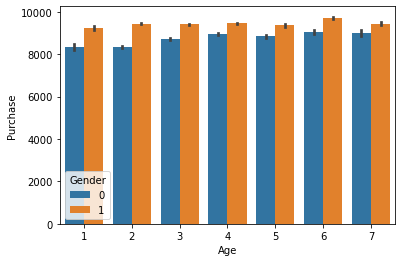

In [241]:
sns.barplot(df_i['Age'],df_i['Purchase'],hue=df_i['Gender'])

#### Purchasing of goods of each range of age are almost equal.
#### We can conclude that the percentage of purchasing goods of men over women is higher.

### Visualizing Occupation Vs Purchased.

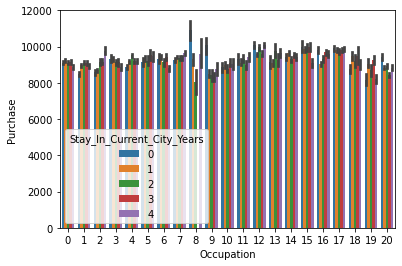

In [242]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

#### All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

### Visualizing Product_category1 Vs Purchased.

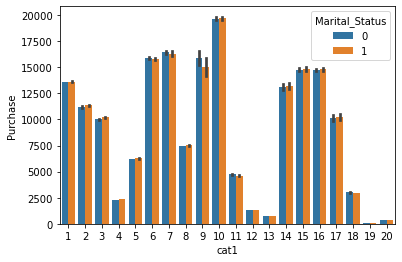

In [243]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

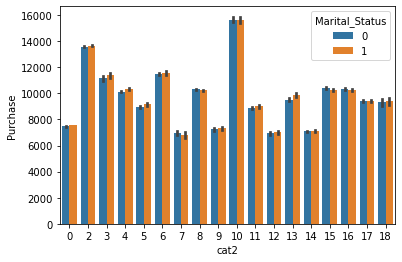

In [244]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

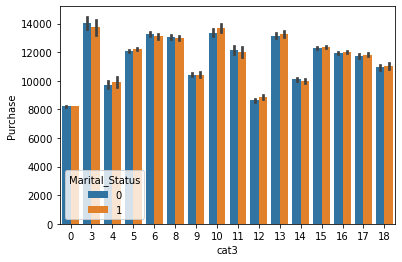

In [245]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.
product category3 is much more purchased by people than product category2 and product category1 

In [246]:
X = df_i.drop('Purchase',axis=1) # dropping the Purchase column to create features
y = df_i.Purchase  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(783667, 11)
(783667,)


In [247]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 11)
(587750,)
(195917, 11)
(195917,)
